### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### bitconnect_price

#### 1. Read the Data

In [2]:
# Read bitconnect_price file
df = pd.read_csv('../data/raw/bitconnect_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,114.74,131.57,108.93,129.42,"8,537,600","756,793,000"
1,2017-09-04,128.26,129.55,110.68,114.13,"30,395,600","845,031,000"
2,2017-09-03,131.71,135.06,125.87,130.99,"5,244,490","866,869,000"
3,2017-09-02,141.11,142.80,128.00,131.33,"5,056,030","926,918,000"
4,2017-09-01,135.66,140.97,133.47,140.97,"7,854,700","890,229,000"


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
#check if the dataset is duplicated
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
224    False
225    False
226    False
227    False
228    False
Length: 229, dtype: bool

In [5]:
df.count()

Date          229
Open          229
High          229
Low           229
Close         229
Volume        229
Market Cap    229
dtype: int64

as we can see we have in this file 7 columns and each column has 229 cell

In [6]:
df.describe()

,Open,High,Low,Close
count,229.000000,229.000000,229.000000,229.000000
mean,33.210547,35.490599,31.128843,33.802779
std,38.957075,41.423524,36.480761,39.482488
min,0.128182,0.156983,0.123697,0.128067
25%,1.830000,1.990000,1.760000,1.860000
50%,10.070000,10.840000,9.700000,10.180000
75%,55.520000,58.860000,53.220000,55.530000
max,141.110000,149.890000,133.470000,140.970000


In [7]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
Date          229 non-null datetime64[ns]
Open          229 non-null float64
High          229 non-null float64
Low           229 non-null float64
Close         229 non-null float64
Volume        229 non-null object
Market Cap    229 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 12.6+ KB


In [8]:
# check and print the number of empty cells (missing data) in each coulmn 
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

as we can see the data frame has 7 columns. each column has 229 cell, and there is no missing data, 
* Volume and Market cap data type are object, it should be number. 

#### 2. Cleaning Data

as i mentioned before the "Volume and Market Cap" have different format and python concedered that as a string not number, so we have to convert all strings into numbers
     

In [9]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [10]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(convert_to_number)

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,229.000000,229.000000,229.000000,229.000000,2.290000e+02,2.290000e+02
mean,33.210547,35.490599,31.128843,33.802779,2.030768e+06,2.152792e+08
std,38.957075,41.423524,36.480761,39.482488,3.041031e+06,2.541095e+08
min,0.128182,0.156983,0.123697,0.128067,5.260000e+02,6.417620e+05
25%,1.830000,1.990000,1.760000,1.860000,2.311930e+05,1.043130e+07
50%,10.070000,10.840000,9.700000,10.180000,7.376190e+05,6.253950e+07
75%,55.520000,58.860000,53.220000,55.530000,2.865970e+06,3.685020e+08
max,141.110000,149.890000,133.470000,140.970000,3.039560e+07,9.269180e+08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
Date          229 non-null datetime64[ns]
Open          229 non-null float64
High          229 non-null float64
Low           229 non-null float64
Close         229 non-null float64
Volume        229 non-null int64
Market Cap    229 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 12.6 KB


In [12]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.996255,0.986916,0.995389,0.799678,0.999277
High,0.996255,1.000000,0.979633,0.995653,0.792106,0.995038
Low,0.986916,0.979633,1.000000,0.991430,0.801535,0.986332
Close,0.995389,0.995653,0.991430,1.000000,0.796492,0.994141
Volume,0.799678,0.792106,0.801535,0.796492,1.000000,0.797989
Market Cap,0.999277,0.995038,0.986332,0.994141,0.797989,1.000000


as we can see, the "Market Cap and many other variables are almost the same, so let's plot data between Market Cap and other variable, then see the relation between the data


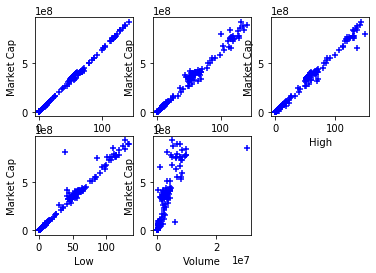

In [13]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

as we can see the Market Cap and (Open, Close and High) have almost a linear relationship

In [14]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [15]:
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Model Score
model.score(Open, Market_Cap)

0.9985542689969863

#### 4. Data Visualization

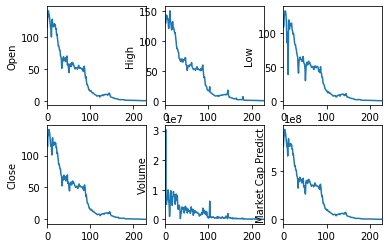

In [17]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df['Market Cap'].plot()